# Normal LSTM 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [ ]:
data = [1,2,3,4,5,6,7,8,9] 
n_steps = 3

In [ ]:
x = [] 
y = [] 
for i in range(n_steps, len(data)):
    x.append(data[i-n_steps:i])
    y.append(data[i])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
x.shape, y.shape

((6, 3), (6,))

In [ ]:
# [rows, steps, feature] -> [6,3,1] 
x = x.reshape(x.shape[0], x.shape[1], 1) 
x.shape

(6, 3, 1)

In [ ]:
# pip install keras

In [ ]:
# pip install tensorflow

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
 
model = Sequential() 
 
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, 1))) 
 
model.add(Dense(1)) 
 
model.compile(loss = 'mean_squared_error' , optimizer = 'adam') 
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs = 300, batch_size = 2, verbose = 0)

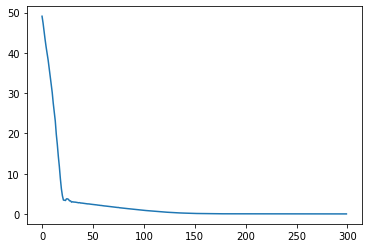

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
test = np.array([7, 8, 9]) 

test = test.reshape((1, n_steps, 1))

In [ ]:
output = model.predict(test) 
output

array([[9.653919]], dtype=float32)

# Stacked **LSTM**

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
 
model = Sequential() 
 
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, 1))) 
 
model.add(Dense(1)) 
 
model.compile(loss = 'mean_squared_error' , optimizer = 'adam') 
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
dense_1 (Dense)              (None, 3, 1)              51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs = 100, batch_size = 2, verbose = 0)

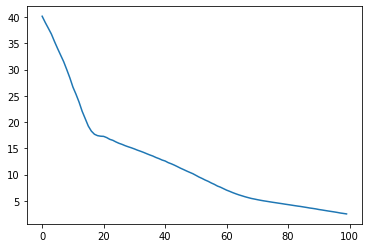

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
test = np.array([7, 8, 9]) 
 
test = test.reshape((1, n_steps, 1))

In [ ]:
output = model.predict(test) 
output

array([[[ 8.32098  ],
        [10.77978  ],
        [ 9.8353405]]], dtype=float32)

# Bidirectional LSTM 

In [ ]:
from keras.layers import Bidirectional
 
model = Sequential()
 
model.add(Bidirectional(LSTM(50, activation = "relu"), input_shape = (n_steps,1)))
 
model.add(Dense(1))
 
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
history = model.fit(x, y, epochs = 100, batch_size = 2, verbose = 0)

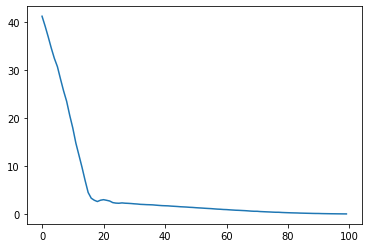

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
test = np.array([7, 8, 9]) 
 
test = test.reshape((1, n_steps, 1))

In [ ]:
output = model.predict(test) 
output

array([[9.898629]], dtype=float32)

# LSTM with Google Train & Test Dataset

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("Google_Stock_Price_Train.csv") 
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
x_train = train[["Open"]]

In [ ]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler() 
 
sc_x_train = sc.fit_transform(x_train)

In [ ]:
sc_x_train

array([[-1.37285476],
       [-1.33320882],
       [-1.34269224],
       ...,
       [ 1.71221829],
       [ 1.64392454],
       [ 1.64010483]])

In [ ]:
def feature_transform(n_steps, data):
  x = [] 
  y = [] 
  for i in range(n_steps, len(data)):
    x.append(data[i-n_steps:i, 0])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

In [ ]:
n_steps = 12

In [ ]:
x_train, y_train = feature_transform(n_steps, sc_x_train)

In [ ]:
x_train.shape, y_train.shape

((1246, 12), (1246,))

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
 
model = Sequential() 
 
model.add(LSTM(200, activation = 'relu', input_shape = (n_steps, 1))) 
 
model.add(Dense(1)) 
 
model.compile(loss = 'mean_squared_error' , optimizer = 'adam') 
 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
42/42 [==============================] - 2s 26ms/step - loss: 0.4094
Epoch 2/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0149
Epoch 3/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0082
Epoch 4/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0086
Epoch 5/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0083
Epoch 6/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0081
Epoch 7/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0077
Epoch 8/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0065
Epoch 9/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0070
Epoch 10/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0058
Epoch 11/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0062
Epoch 12/100
42/42 [==============================] - 1s 25ms/step - loss: 0.0055
Epoch 13/100
42/42 [=====

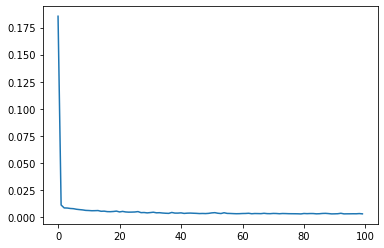

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
test = pd.read_csv("Google_Stock_Price_Test.csv")
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
x_test = test[["Open"]]
 
sc_x_test = sc.fit_transform(x_test)

In [ ]:
x_test, y_test = feature_transform(n_steps, sc_x_test)

In [ ]:
x_test.shape, y_test.shape

((8, 12), (8,))

In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
predictions = sc.inverse_transform(y_pred)

In [ ]:
actual = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
actual

array([[806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
predictions

array([[804.3561 ],
       [806.38446],
       [806.8634 ],
       [819.14496],
       [826.2582 ],
       [831.2701 ],
       [832.7622 ],
       [812.6942 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error 
 
mse = mean_squared_error(actual, predictions) 
 
rmse = np.sqrt(mse) 
 
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Squared Error :  134.8720664034327
Root Mean Squared Error :  11.613443348268106


 from keras.layers import GRU,Dense
from keras.models import Sequential
model=Sequential()
model.add(GRU(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()